In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt

In [2]:
from typing import Literal
device :Literal["cuda", "cpu"] = "cuda" if torch.cuda.is_available() else "cpu"

torch.__version__, torchvision.__version__

('2.0.1', '0.15.2')

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
train_data.classes, train_data.class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
image, label = train_data[0]

image.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Ankle boot')

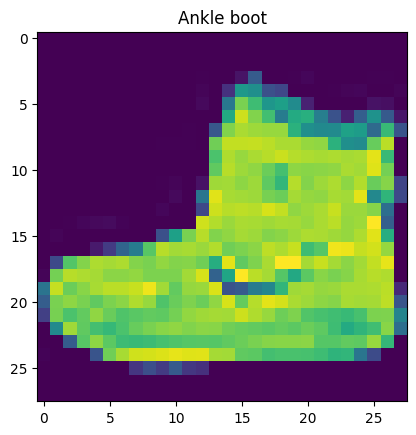

In [8]:
plt.imshow(image.squeeze())
plt.title(label=train_data.classes[label])

In [9]:
from torch.utils.data import DataLoader, Dataset



train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)


train_dataloader.batch_size

32

In [10]:
train_feature_batch, train_label_batch = next(iter(train_dataloader))

train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

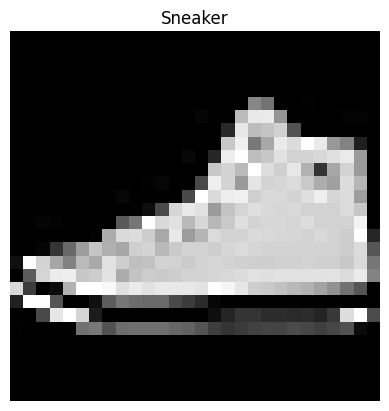

In [11]:
# torch.manual_seed(42)

randInt = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[randInt], train_label_batch[randInt]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(label=train_data.classes[label])
plt.axis(False)

In [12]:
flatten_model = nn.Flatten(start_dim=1, end_dim=-1)

flatten_data = flatten_model(img)
flatten_data.shape

torch.Size([1, 784])

In [13]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_shape: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(start_dim=1, end_dim=-1),
            nn.Linear(in_features=input_shape, out_features=hidden_shape),
            nn.Linear(in_features=hidden_shape, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [14]:
model_0 = FashionMNISTModelV0(784, 50, 10)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [15]:
dummy_x = torch.rand([1, 1, 28, 28])
# dummy_x
y_hat = model_0(dummy_x)
y_hat

tensor([[ 0.0473, -0.1984, -0.5603,  0.0163,  0.4589, -0.1581,  0.1933,  0.0175,
          0.2181,  0.1097]], grad_fn=<AddmmBackward0>)

In [16]:
# model_0.state_dict()

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.02)

In [17]:
from tqdm.auto import tqdm
import time

for i in tqdm(range(1000)):
    # sleep(.1)
    time.sleep(.01)
    pass

  0%|          | 0/1000 [00:00<?, ?it/s]

In [18]:
from timeit import default_timer as timer

def print_train_time(start: float,
                    end: float,
                    device: Literal["cuda", "cpu"]):
    total_time = end-start
    print(f"total train time on device {device}: {total_time:.3f} seconds")
    return total_time

In [19]:
epochs = 5

start = timer()
for epoch in range(epochs):
    model_0.train()

    for batch_num,(X, y) in enumerate(train_dataloader):
        y_hat = model_0(X)
        
        train_loss = loss_fn(y_hat, y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if batch_num % 400 == 0:
            print(f"Epoch: {epoch}, Batch: {batch_num}, Loss: {train_loss.item():.4f}")

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            y_pred = model_0(X)
            test_loss = loss_fn(y_pred, y)
            
            print(f"Epoch: {epoch}, Test Loss: {test_loss.item():.4f}")

end = timer()
print_train_time(start, end, device)
    
           

Epoch: 0, Batch: 0, Loss: 2.3344
Epoch: 0, Batch: 400, Loss: 0.6015
Epoch: 0, Batch: 800, Loss: 0.7241
Epoch: 0, Batch: 1200, Loss: 0.6093
Epoch: 0, Batch: 1600, Loss: 0.6440
Epoch: 0, Test Loss: 0.6393
Epoch: 0, Test Loss: 0.5450
Epoch: 0, Test Loss: 0.3604
Epoch: 0, Test Loss: 0.3214
Epoch: 0, Test Loss: 0.6101
Epoch: 0, Test Loss: 0.3221
Epoch: 0, Test Loss: 0.3550
Epoch: 0, Test Loss: 0.7042
Epoch: 0, Test Loss: 0.4213
Epoch: 0, Test Loss: 0.5120
Epoch: 0, Test Loss: 0.4294
Epoch: 0, Test Loss: 0.3969
Epoch: 0, Test Loss: 0.5414
Epoch: 0, Test Loss: 0.4226
Epoch: 0, Test Loss: 0.6945
Epoch: 0, Test Loss: 0.5064
Epoch: 0, Test Loss: 0.3937
Epoch: 0, Test Loss: 0.6541
Epoch: 0, Test Loss: 0.5369
Epoch: 0, Test Loss: 0.9348
Epoch: 0, Test Loss: 0.6691
Epoch: 0, Test Loss: 0.6553
Epoch: 0, Test Loss: 0.7753
Epoch: 0, Test Loss: 0.4219
Epoch: 0, Test Loss: 0.4731
Epoch: 0, Test Loss: 0.5031
Epoch: 0, Test Loss: 0.3102
Epoch: 0, Test Loss: 0.3853
Epoch: 0, Test Loss: 0.6118
Epoch: 0, Tes

17.469128792